<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>NLP with Deep Learning for Everyone</h1>
<h1>Sequence Modeling</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import gzip
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt 

import tqdm
from tqdm.notebook import tqdm
tqdm.pandas()

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import LSTM, GRU
from keras.layers import Dense
from keras.datasets import imdb
from keras_preprocessing import sequence

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.12.3

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 23.3.0
Machine     : arm64
Processor   : arm
CPU cores   : 16
Architecture: 64bit

Git hash: 3022f3d8aeb2c24ebf2d47d4e9999181a7ad777d

pandas             : 2.0.3
json               : 2.0.9
keras_preprocessing: 1.1.2
keras              : 2.12.0
matplotlib         : 3.7.2
tensorflow         : 2.12.0
numpy              : 1.23.5
watermark          : 2.4.3



Load default figure style

In [3]:
plt.style.use('d4sci.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Load the IMDB dataset

In [4]:
top_words = 10000
max_words = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

word_dict = imdb.get_word_index()
word_list = ["<PAD>", "<START>", "<UNK>", "<UNUSED>"]
word_list.extend([k for k, v in sorted(word_dict.items(), key = lambda x:x[1])])
word_list = np.array(word_list)

In [5]:
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# SimpleRNN model

In [6]:
model = Sequential()
model.add(Embedding(top_words, 32))
## <==> ##
model.add(SimpleRNN(32))
## <==> ##
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 15s 75ms/step - loss: 0.5306 - accuracy: 0.7390 - val_loss: 0.4341 - val_accuracy: 0.8141
Epoch 2/10
196/196 [==============================] - 15s 78ms/step - loss: 0.3299 - accuracy: 0.8681 - val_loss: 0.3871 - val_accuracy: 0.8300
Epoch 3/10
196/196 [==============================] - 15s 77ms/step - loss: 0.2342 - accuracy: 0.9103 - val_loss: 0.3442 - val_accuracy: 0.8569
Epoch 4/10
196/196 [==============================] - 15s 75ms/step - loss: 0.1720 - accuracy: 0.9382 - val_loss: 0.3964 - val_accuracy: 0.8507
Epoch 5/10
196/196 [==============================] - 15s 74ms/step - loss: 0.1327 - accuracy: 0.9542 - val_loss: 0.4275 - val_accuracy: 0.8538
Epoch 6/10
196/196 [==============================] - 15s 74ms/step - loss: 0.0924 - accuracy: 0.9709 - val_loss: 0.4483 - val_accuracy: 0.8490
Epoch 7/10
196/196 [==============================] - 12s 63ms/step - loss: 0.0657 - accuracy: 0.9799 - val_loss: 0.4518 - val_accuracy:

In [9]:
def plot_history(history):    
    fig, ax_lst = plt.subplots(1, 2, sharex=True, sharey=True)

    epochs = np.array(history.epoch) + 1
    
    ax_lst[0].plot(epochs, history.history['loss'], label='Training')
    ax_lst[0].plot(epochs, history.history['val_loss'], label='Testing')
    ax_lst[0].set_ylabel('Loss')
    ax_lst[0].set_xlabel('Epoch')
    ax_lst[0].set_xticks(epochs)
    
    best_epoch = np.argmin(history.history['val_loss']) + 1
    ax_lst[0].axvline(x=best_epoch, linestyle=':', color=colors[2])
    ax_lst[0].legend()
    

    ax_lst[1].plot(epochs, history.history['accuracy'], label='Training')
    ax_lst[1].plot(epochs, history.history['val_accuracy'], label='Testing')
    ax_lst[1].set_ylabel('Accuracy')
    ax_lst[1].set_xlabel('Epoch')
    ax_lst[1].set_xticks(epochs)
    ax_lst[1].axvline(x=best_epoch, linestyle=':', color=colors[2])


    fig.tight_layout()

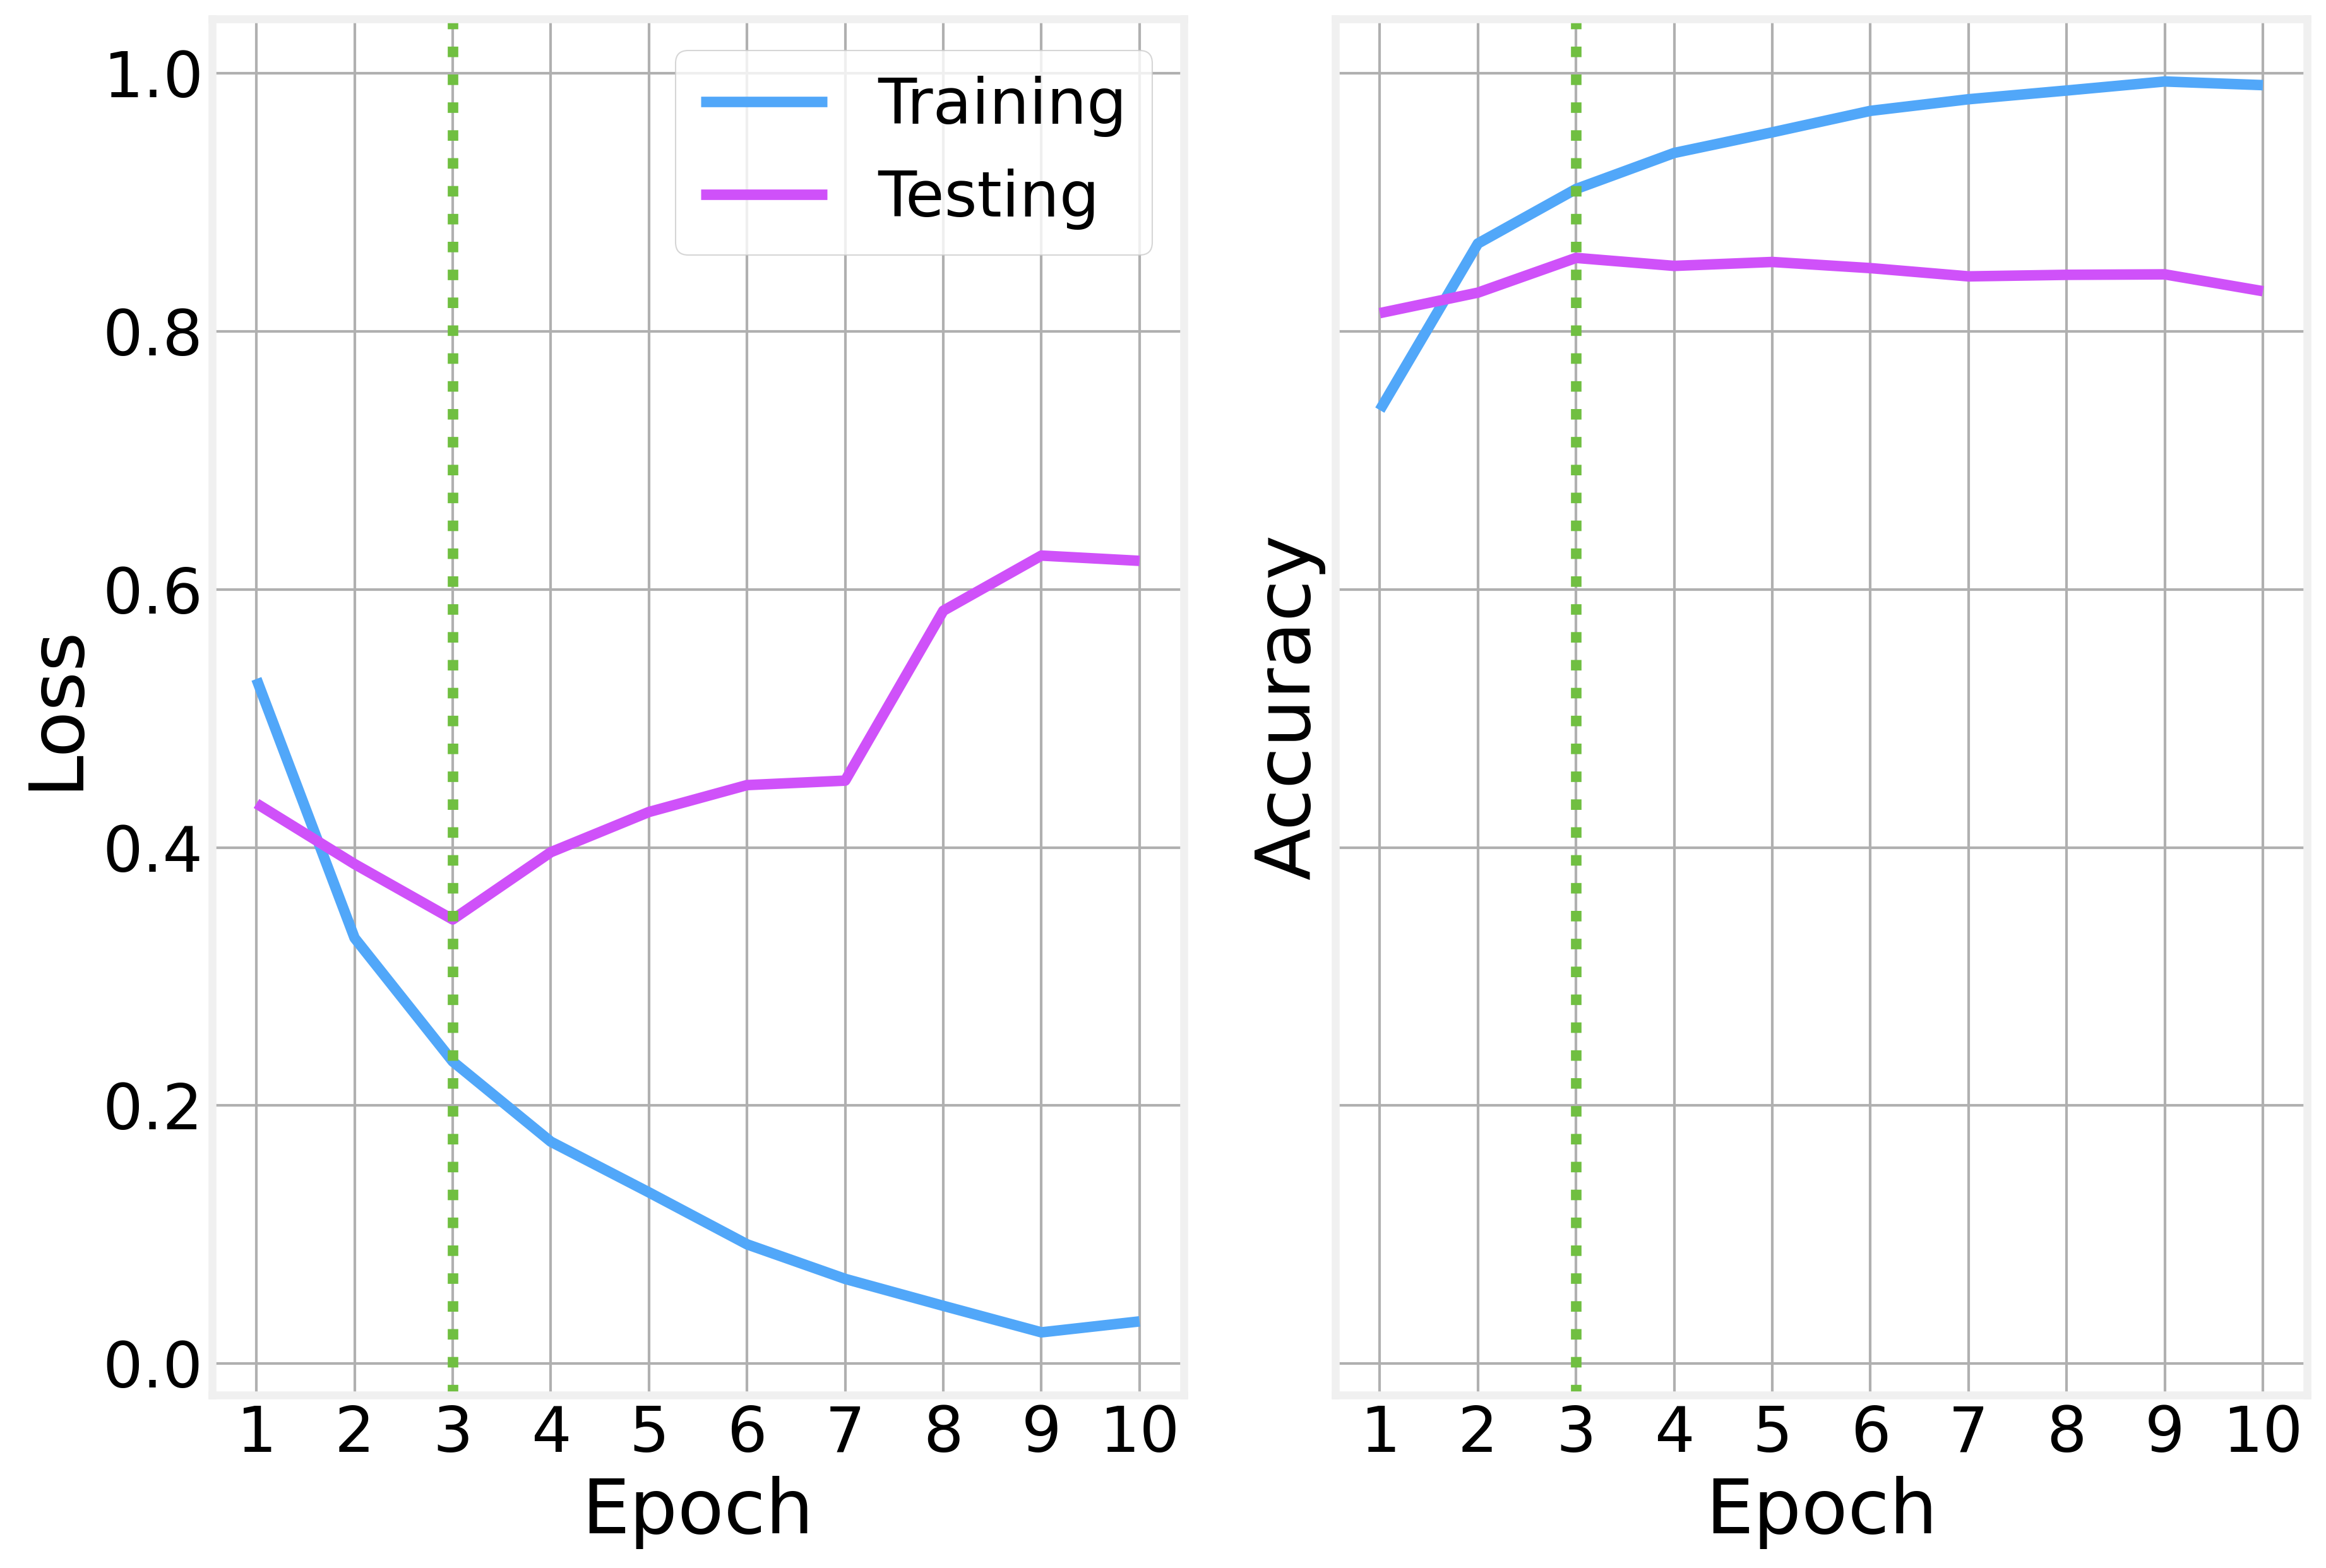

In [10]:
plot_history(history)

# GRU

In [11]:
model = Sequential()
model.add(Embedding(top_words, 32))
## <==> ##
model.add(GRU(32))
## <==> ##
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 26s 132ms/step - loss: 0.4863 - accuracy: 0.7470 - val_loss: 0.3360 - val_accuracy: 0.8592
Epoch 2/10
196/196 [==============================] - 25s 130ms/step - loss: 0.2531 - accuracy: 0.9006 - val_loss: 0.3057 - val_accuracy: 0.8741
Epoch 3/10
196/196 [==============================] - 25s 130ms/step - loss: 0.2001 - accuracy: 0.9253 - val_loss: 0.3163 - val_accuracy: 0.8747
Epoch 4/10
196/196 [==============================] - 25s 130ms/step - loss: 0.1543 - accuracy: 0.9441 - val_loss: 0.3437 - val_accuracy: 0.8723
Epoch 5/10
196/196 [==============================] - 25s 130ms/step - loss: 0.1225 - accuracy: 0.9588 - val_loss: 0.3660 - val_accuracy: 0.8668
Epoch 6/10
196/196 [==============================] - 25s 130ms/step - loss: 0.1081 - accuracy: 0.9642 - val_loss: 0.3942 - val_accuracy: 0.8604
Epoch 7/10
196/196 [==============================] - 25s 130ms/step - loss: 0.0817 - accuracy: 0.9738 - val_loss: 0.4624 - val_ac

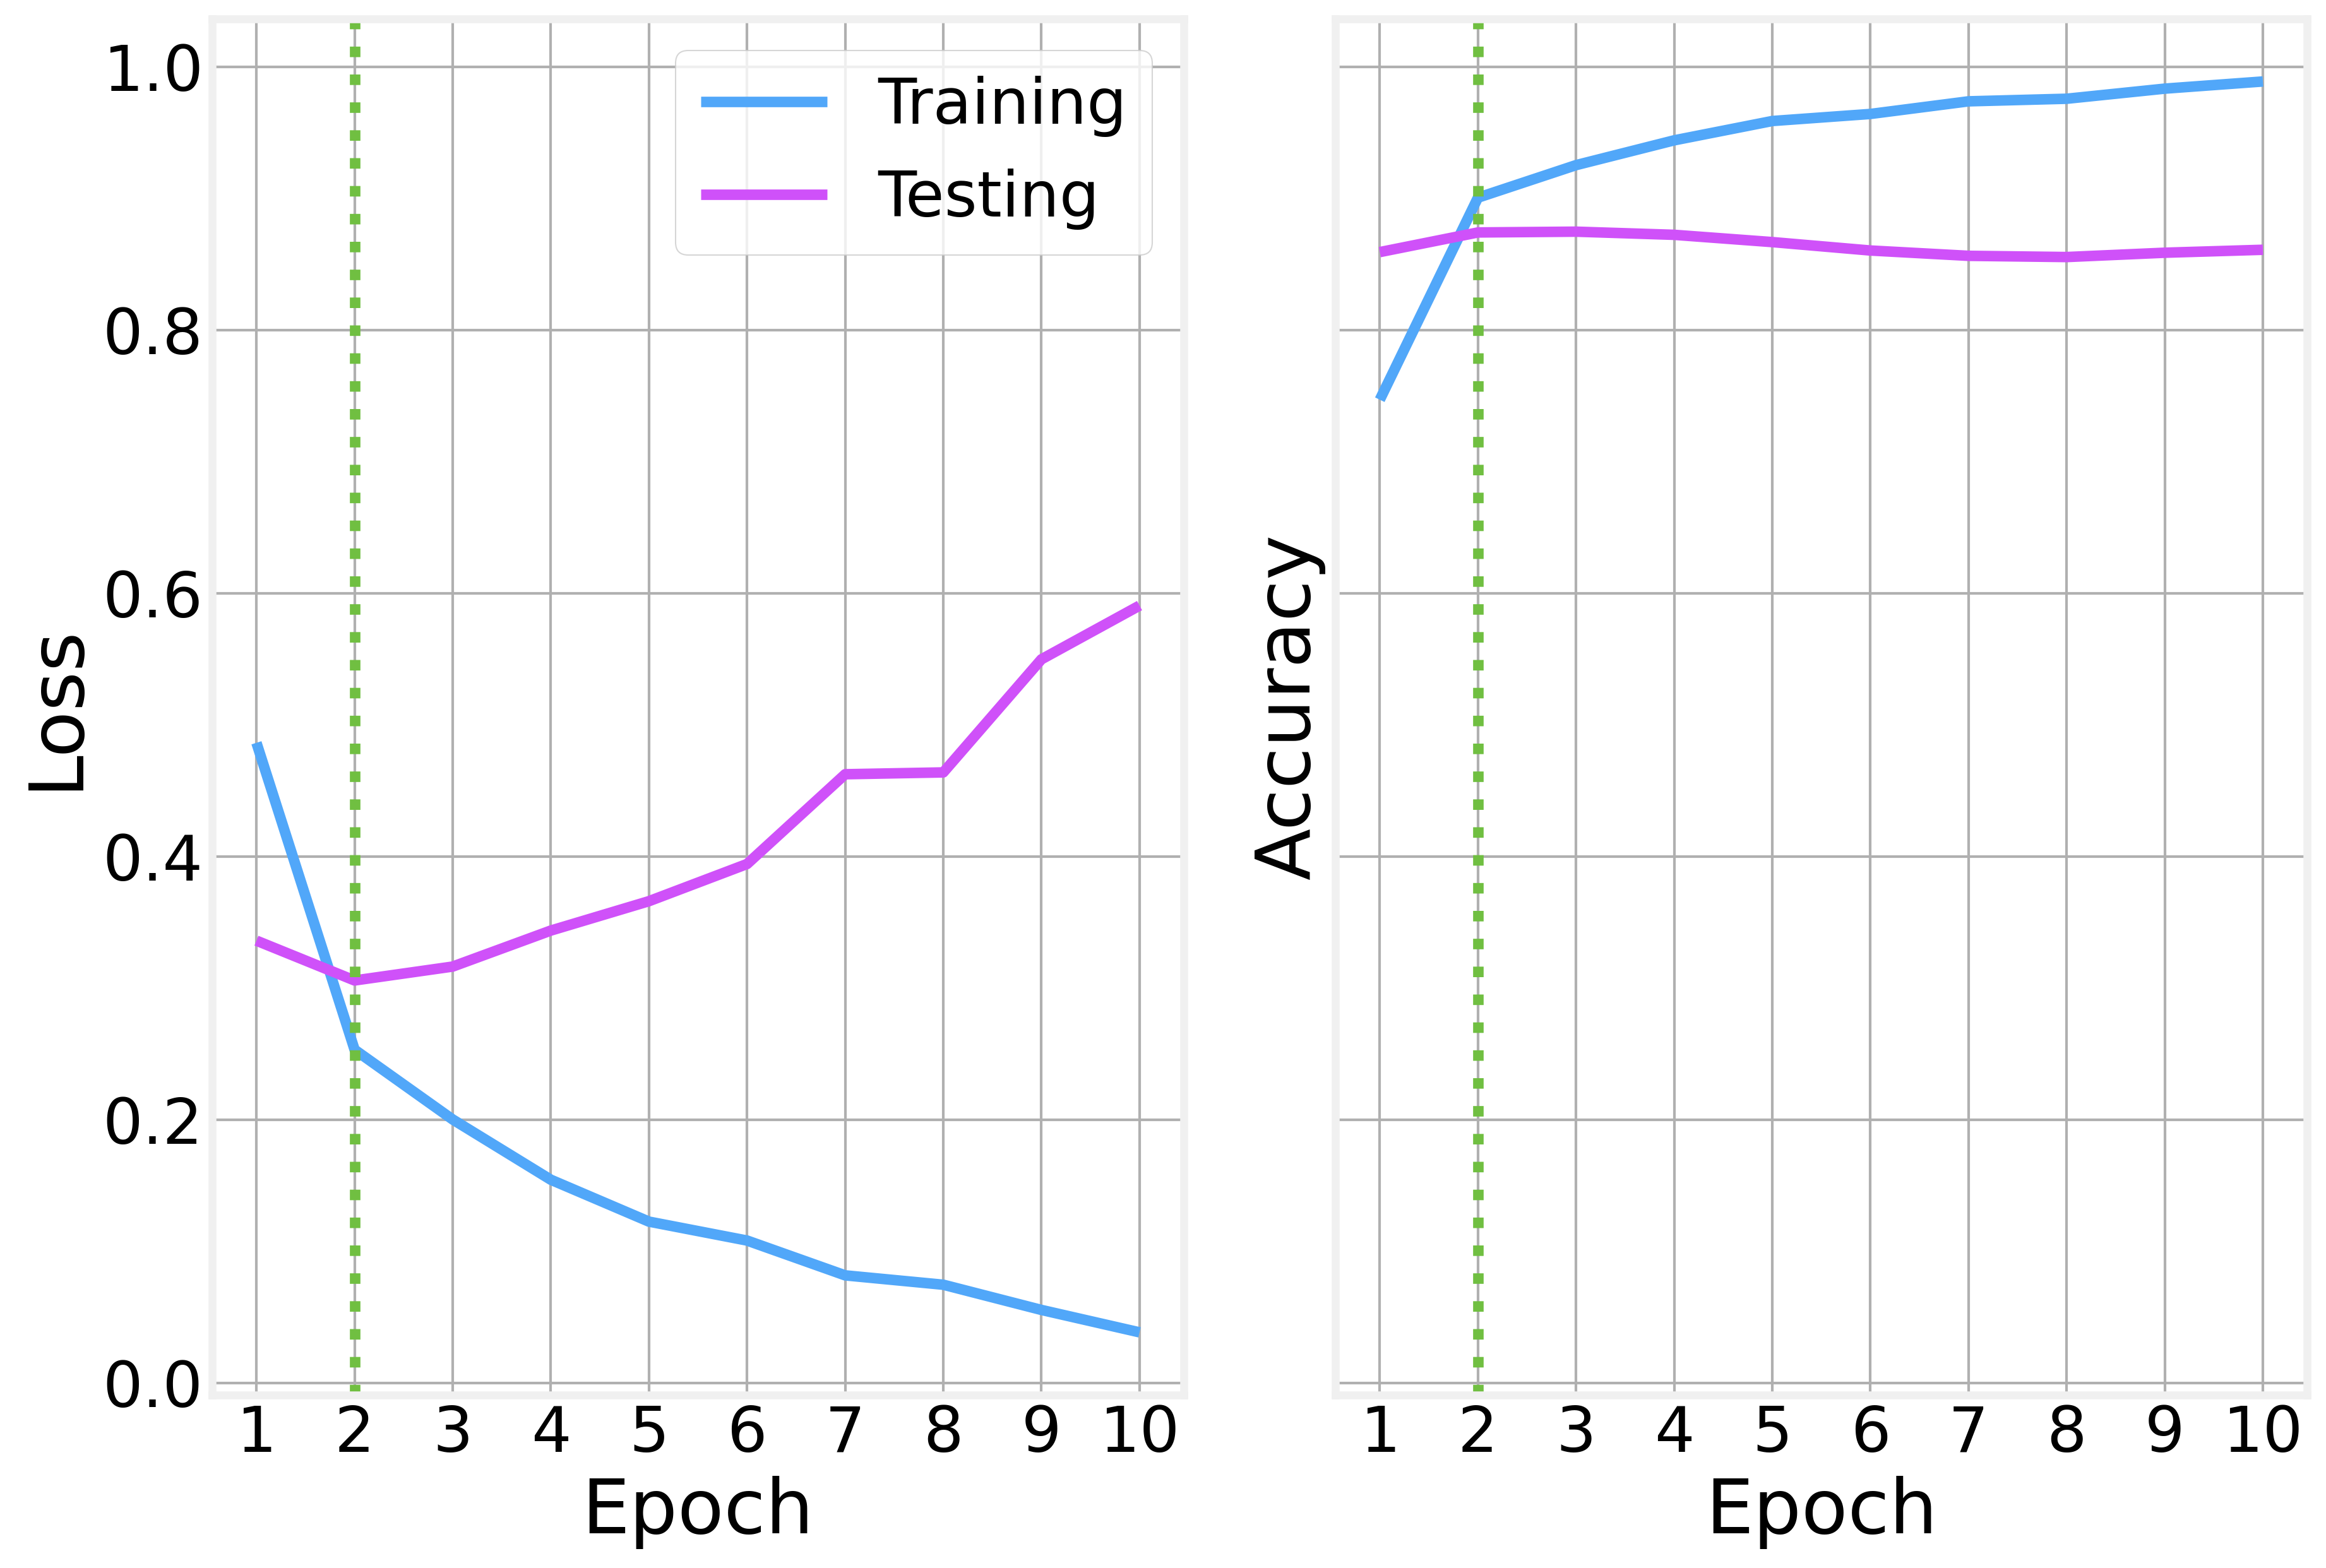

In [13]:
plot_history(history)

# LSTM

In [14]:
model = Sequential()
model.add(Embedding(top_words, 32))
## <==> ##
model.add(LSTM(32))
## <==> ##
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 30s 151ms/step - loss: 0.4760 - accuracy: 0.7738 - val_loss: 0.3532 - val_accuracy: 0.8568
Epoch 2/10
196/196 [==============================] - 29s 150ms/step - loss: 0.2831 - accuracy: 0.8870 - val_loss: 0.2931 - val_accuracy: 0.8736
Epoch 3/10
196/196 [==============================] - 29s 150ms/step - loss: 0.1864 - accuracy: 0.9300 - val_loss: 0.3037 - val_accuracy: 0.8744
Epoch 4/10
196/196 [==============================] - 30s 152ms/step - loss: 0.1609 - accuracy: 0.9414 - val_loss: 0.3341 - val_accuracy: 0.8776
Epoch 5/10
196/196 [==============================] - 29s 150ms/step - loss: 0.1283 - accuracy: 0.9535 - val_loss: 0.3462 - val_accuracy: 0.8648
Epoch 6/10
196/196 [==============================] - 30s 154ms/step - loss: 0.0959 - accuracy: 0.9679 - val_loss: 0.4441 - val_accuracy: 0.8612
Epoch 7/10
196/196 [==============================] - 31s 156ms/step - loss: 0.0832 - accuracy: 0.9734 - val_loss: 0.4328 - val_ac

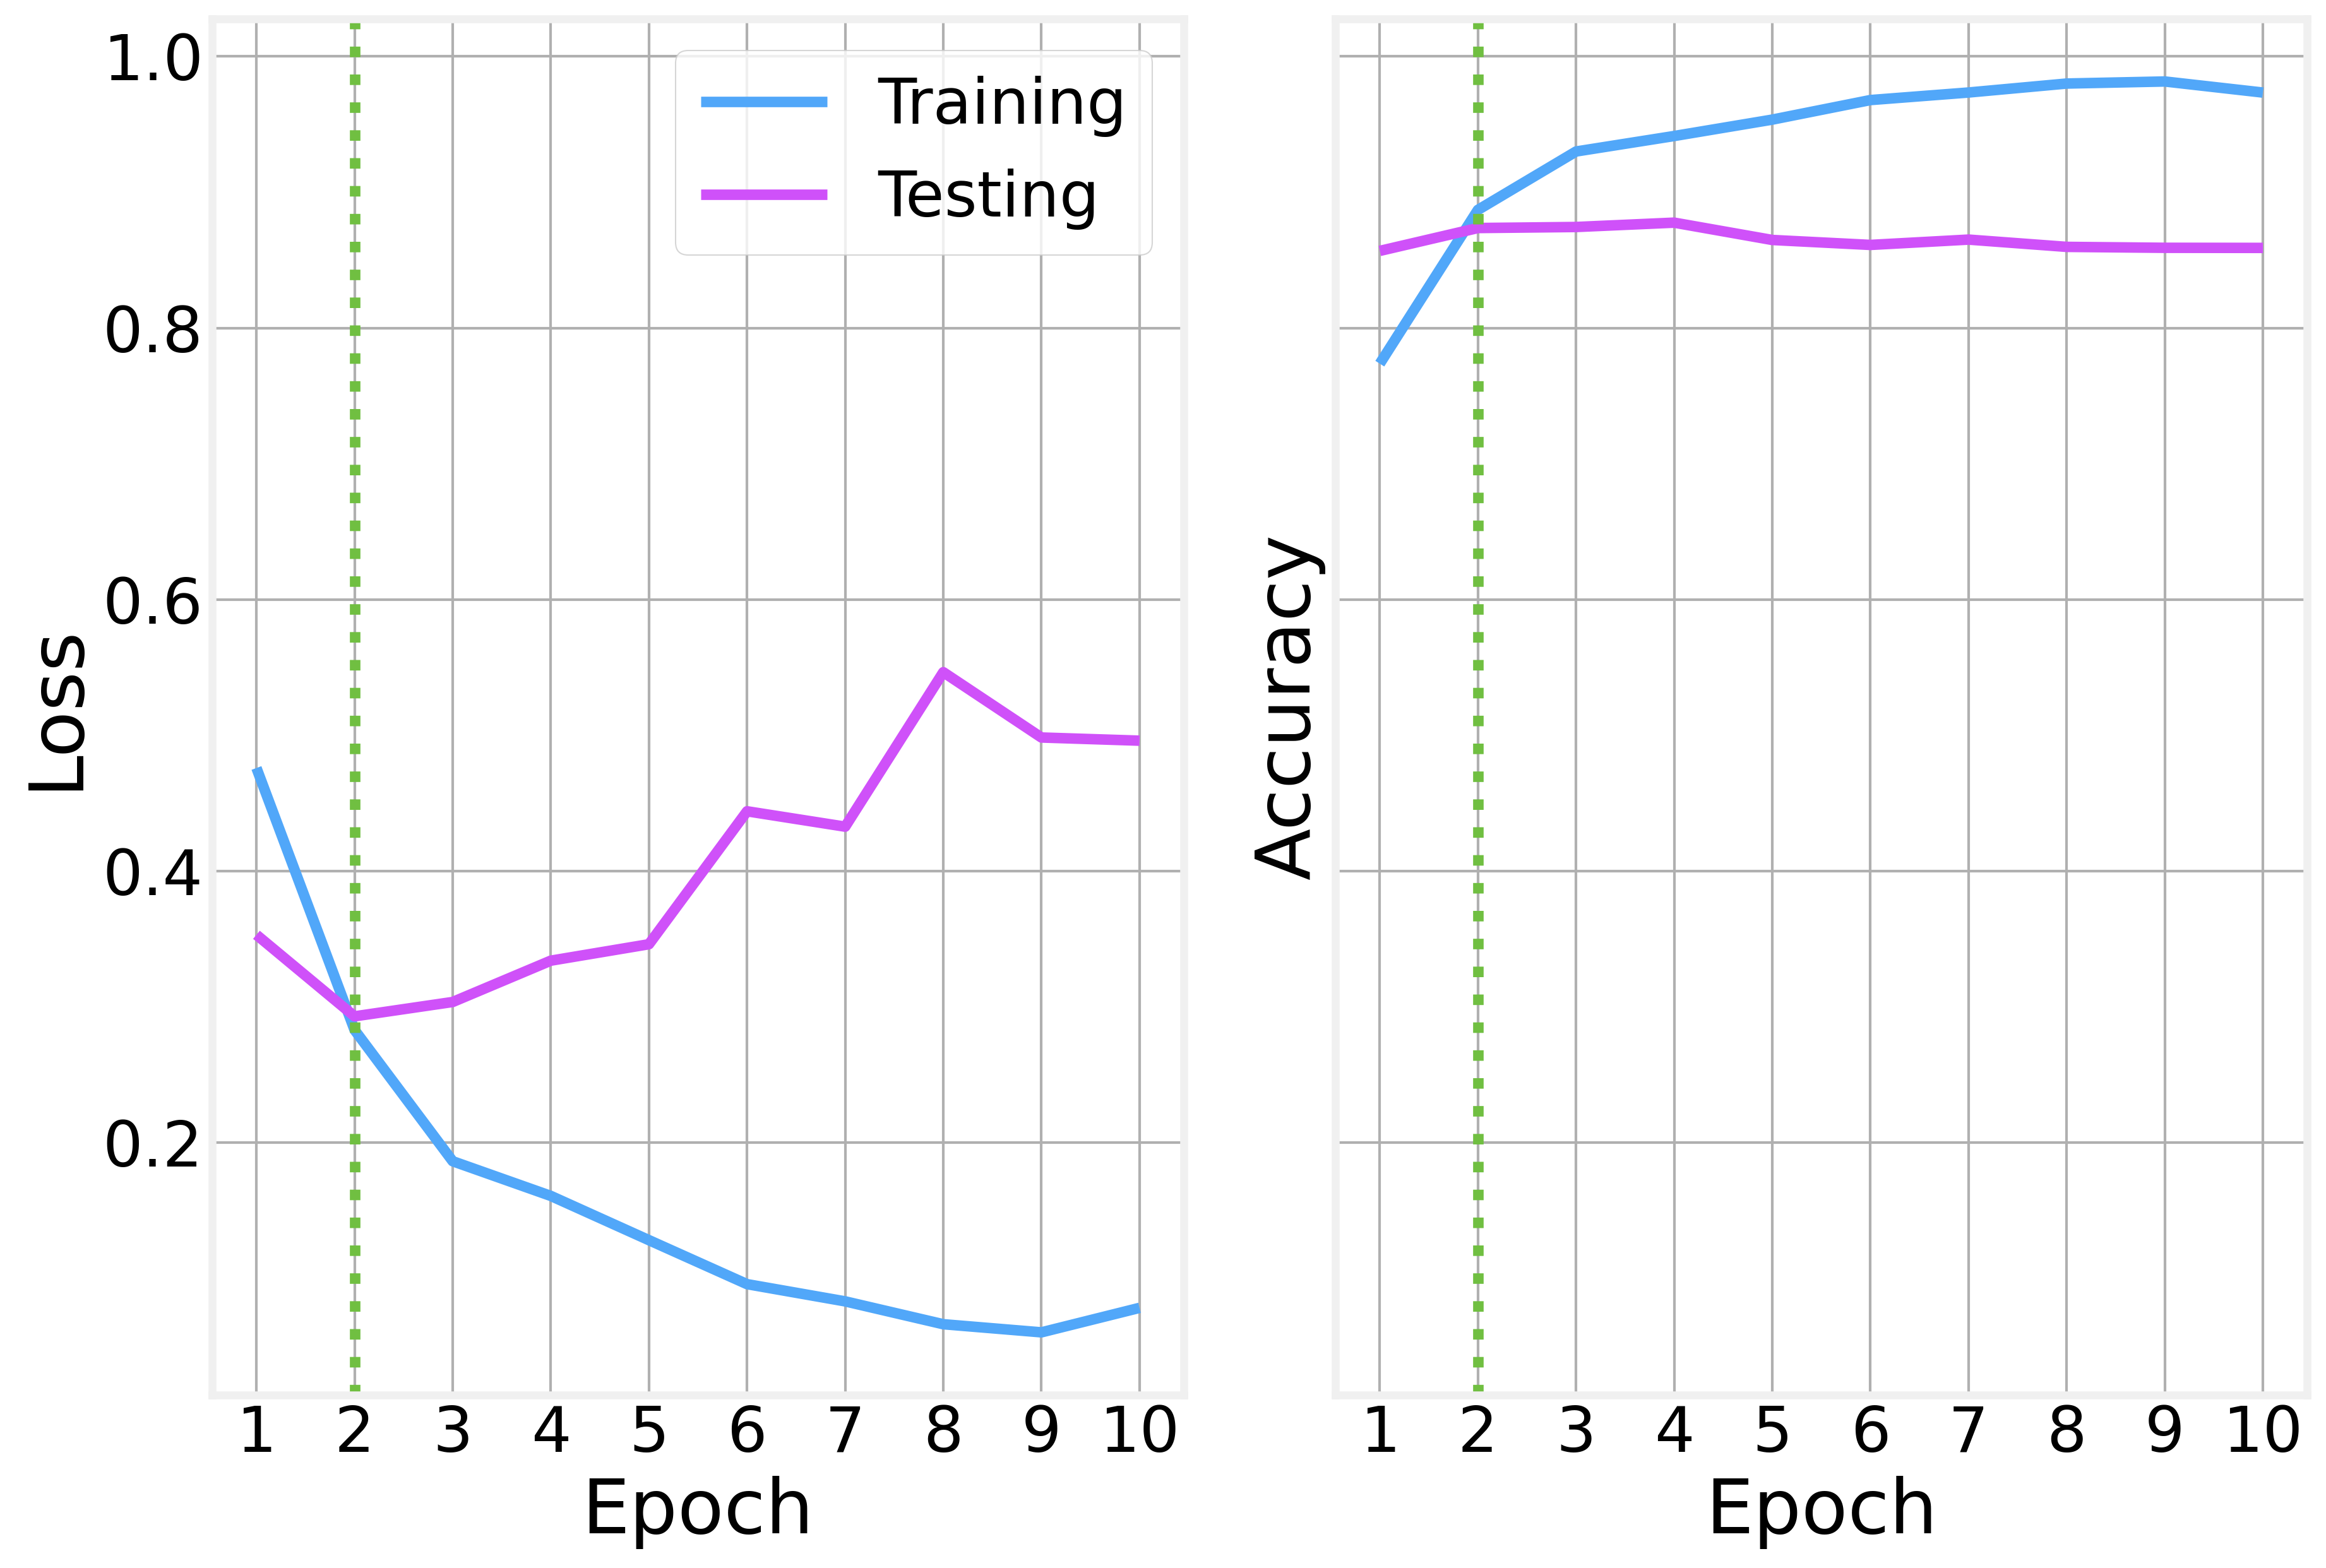

In [16]:
plot_history(history)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>